In [189]:
import numpy as np
import plotly.graph_objects as go
import numpy as np
import random
from typing import List, Tuple
from scipy.spatial import KDTree

In [190]:



some_range = list(range(0, 10))
some_choice_index = random.choice(list(range(len(some_range))))
del some_range[some_choice_index]
some_range


[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [191]:
def get_box_min_max(box_range: List[int]):
    index_range = list(range(len(box_range)))
    min_index = random.choice(index_range)
    del index_range[min_index]
    max_index = random.choice(index_range)
    
    return box_range[min_index], box_range[max_index]


def generate_box(range_min, range_max):
    box_range = list(range(range_min, range_max))
    
    x_min, x_max = get_box_min_max(box_range)
    y_min, y_max = get_box_min_max(box_range)
    z_min, z_max = get_box_min_max(box_range)
    
    return np.array([
        [x_min, x_min, x_max, x_max, x_min, x_min, x_max, x_max,],
        [y_min, y_max, y_max, y_min, y_min, y_max, y_max, y_min,],
        [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max,]
    ])

greek_symbols = ["alpha", "beta", "gamma", "delta", "epsilon", "zeta"]

# boxes = [generate_box() for _ in range(5)]
# boxes

boxes = {greek_symbols[i]: generate_box(0, 100) for i in range(6)}
boxes


{'alpha': array([[84, 84, 59, 59, 84, 84, 59, 59],
        [72, 51, 51, 72, 72, 51, 51, 72],
        [52, 52, 52, 52, 44, 44, 44, 44]]),
 'beta': array([[64, 64, 44, 44, 64, 64, 44, 44],
        [67, 51, 51, 67, 67, 51, 51, 67],
        [51, 51, 51, 51,  6,  6,  6,  6]]),
 'gamma': array([[87, 87, 96, 96, 87, 87, 96, 96],
        [24, 57, 57, 24, 24, 57, 57, 24],
        [27, 27, 27, 27, 75, 75, 75, 75]]),
 'delta': array([[85, 85, 83, 83, 85, 85, 83, 83],
        [46, 11, 11, 46, 46, 11, 11, 46],
        [74, 74, 74, 74, 55, 55, 55, 55]]),
 'epsilon': array([[28, 28,  5,  5, 28, 28,  5,  5],
        [11,  9,  9, 11, 11,  9,  9, 11],
        [90, 90, 90, 90, 64, 64, 64, 64]]),
 'zeta': array([[92, 92, 71, 71, 92, 92, 71, 71],
        [26, 98, 98, 26, 26, 98, 98, 26],
        [ 8,  8,  8,  8, 38, 38, 38, 38]])}

In [192]:
some_array = np.array([
    [0, 1, 3,],
    [4, 5, 6,]
])

kdtree = KDTree(some_array)

kdtree.data

array([[0., 1., 3.],
       [4., 5., 6.]])

In [193]:
kdtree.leafsize

10

In [194]:
# Query kdtree based on r (radius) around a point (x)
matching_point_indices = kdtree.query_ball_point(x=[0, 0 , 0], r=4)

In [195]:
for point_index in matching_point_indices:
    print(kdtree.data[point_index])

[0. 1. 3.]


In [196]:
tree_alpha = KDTree(np.transpose(boxes["alpha"]))
tree_alpha.data

array([[84., 72., 52.],
       [84., 51., 52.],
       [59., 51., 52.],
       [59., 72., 52.],
       [84., 72., 44.],
       [84., 51., 44.],
       [59., 51., 44.],
       [59., 72., 44.]])

In [197]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [198]:
# TODO: next step here is to push ALL datapoints into the kdtree but use a map to their indices
# i.e. 
# example = {
#     0: "beta",
#     ...
#     7: "beta",
#     8: "gamma",
#     ...
#     15: "gamma",
#     ...
# }
# Then we can query the original shape/box by its point indices
box_names = ["beta", "gamma", "delta", "epsilon"]  # TODO: Is there a better way to directly tie the box_name to the given array?
transposed_points = np.transpose(boxes[box_names[0]])
for box_name in box_names[1:]:
    transposed_points = np.append(transposed_points, np.transpose(boxes[box_name]), axis=0)

tree_beta = KDTree(transposed_points)
tree_beta.data

# TODO: Continue translating data to use new 'boxes' dictionary

array([[64., 67., 51.],
       [64., 51., 51.],
       [44., 51., 51.],
       [44., 67., 51.],
       [64., 67.,  6.],
       [64., 51.,  6.],
       [44., 51.,  6.],
       [44., 67.,  6.],
       [87., 24., 27.],
       [87., 57., 27.],
       [96., 57., 27.],
       [96., 24., 27.],
       [87., 24., 75.],
       [87., 57., 75.],
       [96., 57., 75.],
       [96., 24., 75.],
       [85., 46., 74.],
       [85., 11., 74.],
       [83., 11., 74.],
       [83., 46., 74.],
       [85., 46., 55.],
       [85., 11., 55.],
       [83., 11., 55.],
       [83., 46., 55.],
       [28., 11., 90.],
       [28.,  9., 90.],
       [ 5.,  9., 90.],
       [ 5., 11., 90.],
       [28., 11., 64.],
       [28.,  9., 64.],
       [ 5.,  9., 64.],
       [ 5., 11., 64.]])

In [199]:
import sys

box_map = {}
i = 0

for box_name in box_names:
    for j in range(0 + i, 8 + i):
        box_map[j] = box_name
    i += 8

sys.getsizeof(box_map)

1176

In [200]:
box_map[11]

'gamma'

In [201]:
list_of_indices = tree_alpha.query_ball_tree(other=tree_beta, r=3)
list_of_indices

[[], [], [], [], [], [], [], []]

In [202]:
box_matches = []
for indices in list_of_indices:
    for i in indices:
        if box_map[i] not in box_matches:
            box_matches.append(box_map[i])
box_matches

[]

In [203]:
box = box_map[0]
box

'beta'

In [204]:
# for each element in `tree_alpha`, `list_of_indices[i]` is a list of indices of neighbors in `tree_beta.data`
# This loop prints all points in alpha that are near beta
transformed_points = []
for i, indices in enumerate(list_of_indices):
    for j in indices:
        print(f"ALPHA POINT: {tree_alpha.data[i]} -> BETA POINT: {tree_beta.data[j]}")
        point = np.array([
            tree_alpha.data[i],
            tree_beta.data[j]
        ])
        transformed_points.append(np.transpose(point))

# TODO: Need shapes with two points each only to create lines in 3d
"""
i.e.
  a  b
[ 
 [4, 4],  # x
 [4, 2],  # y
 [1, 2]   # z
]
"""

'\ni.e.\n  a  b\n[ \n [4, 4],  # x\n [4, 2],  # y\n [1, 2]   # z\n]\n'

In [205]:
np.transpose(tree_beta.data)

array([[64., 64., 44., 44., 64., 64., 44., 44., 87., 87., 96., 96., 87.,
        87., 96., 96., 85., 85., 83., 83., 85., 85., 83., 83., 28., 28.,
         5.,  5., 28., 28.,  5.,  5.],
       [67., 51., 51., 67., 67., 51., 51., 67., 24., 57., 57., 24., 24.,
        57., 57., 24., 46., 11., 11., 46., 46., 11., 11., 46., 11.,  9.,
         9., 11., 11.,  9.,  9., 11.],
       [51., 51., 51., 51.,  6.,  6.,  6.,  6., 27., 27., 27., 27., 75.,
        75., 75., 75., 74., 74., 74., 74., 55., 55., 55., 55., 90., 90.,
        90., 90., 64., 64., 64., 64.]])

In [206]:
np.transpose(tree_beta.data[8:16])

array([[87., 87., 96., 96., 87., 87., 96., 96.],
       [24., 57., 57., 24., 24., 57., 57., 24.],
       [27., 27., 27., 27., 75., 75., 75., 75.]])

0
8
16
24


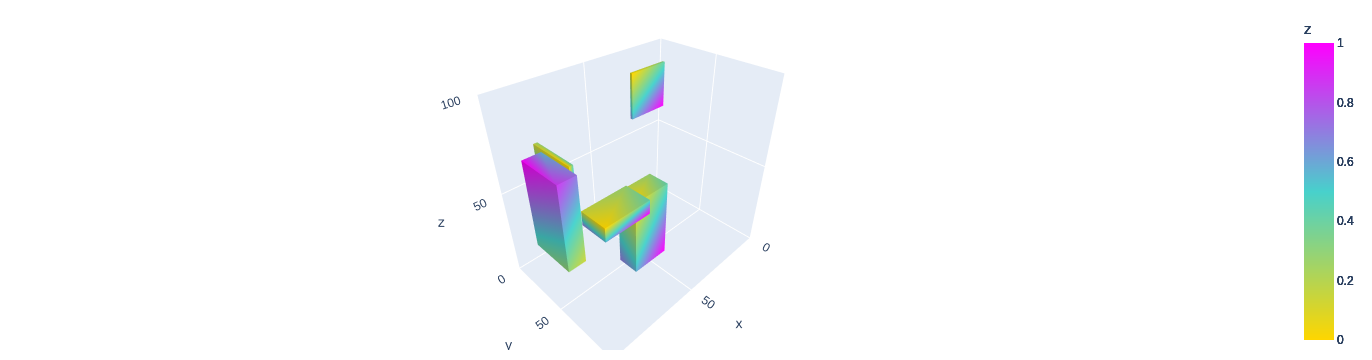

In [207]:
def add_3d_line(fig, coordinates: np.array):
    fig.add_trace(
        go.Scatter3d(
            x=coordinates[0],
            y=coordinates[1],
            z=coordinates[2],
            marker={
                "size": 4,
                "color": [0, 1],
                "colorscale": "Bluyl"
            }
))
                

fig = go.Figure()

for points in transformed_points:
    add_3d_line(fig, points)

add_mesh_3d(fig, np.transpose(tree_alpha.data), name="ALPHA")


for i in range(0, len(tree_beta.data), 8):
    print(i)
    add_mesh_3d(fig, np.transpose(tree_beta.data[i:i + 8]))

fig.update_layout(
    scene = {
        "xaxis": {
            "nticks": 4, 
            "range": [0,100],
        },
        "yaxis": {
            "nticks": 4, 
            "range": [0, 100],
        },
        "zaxis": {
            "nticks": 4, 
            "range": [0,100],
        },
    },
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

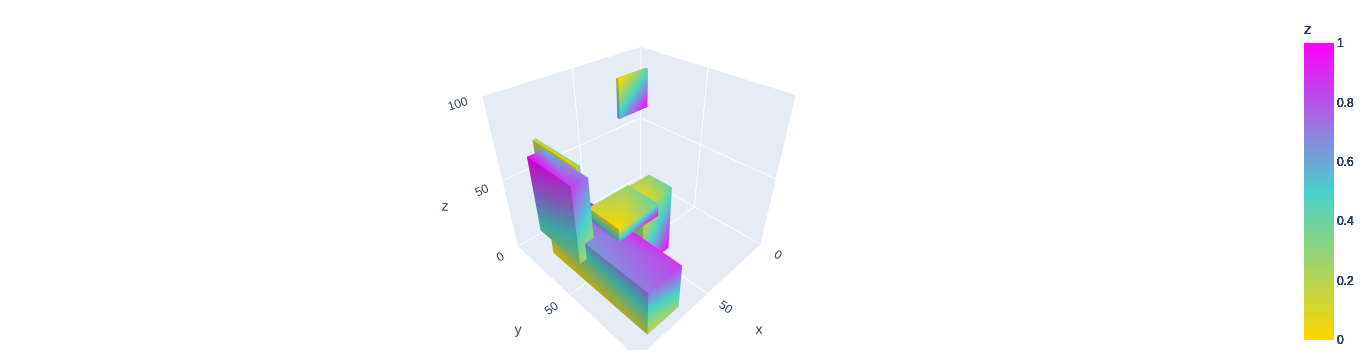

In [208]:


def add_mesh_3d(fig, coordinates: np.array, name=None):
    fig.add_trace(
        go.Mesh3d(
            # 8 vertices of a cube
            x=coordinates[0],
            y=coordinates[1],
            z=coordinates[2],
            colorbar_title='z',
            colorscale=[[0, 'gold'],
                        [0.5, 'mediumturquoise'],
                        [1, 'magenta']],
            # Intensity of each vertex, which will be interpolated and color-coded
            intensity = np.linspace(0, 1, 8, endpoint=True),
            # i, j and k give the vertices of triangles
            i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
            j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
            k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
            name=name,
            flatshading=True
        )
    )
    
fig = go.Figure()

for box in list(boxes.values()):
    add_mesh_3d(fig, box)

fig.update_layout(
    scene = {
        "xaxis": {
            "nticks": 4, 
            "range": [0,100],
        },
        "yaxis": {
            "nticks": 4, 
            "range": [0, 100],
        },
        "zaxis": {
            "nticks": 4, 
            "range": [0,100],
        },
    },
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()


In [209]:
# TODO: Explore paritioning and showing points of partition to be considered
box_alpha = boxes["alpha"]
box_alpha

array([[84, 84, 59, 59, 84, 84, 59, 59],
       [72, 51, 51, 72, 72, 51, 51, 72],
       [52, 52, 52, 52, 44, 44, 44, 44]])

In [210]:
import itertools

partition_map = {}
dimensions = ["x", "y", "z"]
range_min = 0
range_max = 10
fidelity = 2

x_vals = list(range(range_min, range_max, fidelity))
all_combo = itertools.product(x_vals, x_vals, x_vals)
for combo in all_combo:
    partition_map["".join([str(i) for i in combo])] = []
    
partition_map

{'000': [],
 '002': [],
 '004': [],
 '006': [],
 '008': [],
 '020': [],
 '022': [],
 '024': [],
 '026': [],
 '028': [],
 '040': [],
 '042': [],
 '044': [],
 '046': [],
 '048': [],
 '060': [],
 '062': [],
 '064': [],
 '066': [],
 '068': [],
 '080': [],
 '082': [],
 '084': [],
 '086': [],
 '088': [],
 '200': [],
 '202': [],
 '204': [],
 '206': [],
 '208': [],
 '220': [],
 '222': [],
 '224': [],
 '226': [],
 '228': [],
 '240': [],
 '242': [],
 '244': [],
 '246': [],
 '248': [],
 '260': [],
 '262': [],
 '264': [],
 '266': [],
 '268': [],
 '280': [],
 '282': [],
 '284': [],
 '286': [],
 '288': [],
 '400': [],
 '402': [],
 '404': [],
 '406': [],
 '408': [],
 '420': [],
 '422': [],
 '424': [],
 '426': [],
 '428': [],
 '440': [],
 '442': [],
 '444': [],
 '446': [],
 '448': [],
 '460': [],
 '462': [],
 '464': [],
 '466': [],
 '468': [],
 '480': [],
 '482': [],
 '484': [],
 '486': [],
 '488': [],
 '600': [],
 '602': [],
 '604': [],
 '606': [],
 '608': [],
 '620': [],
 '622': [],
 '624': [],
 '62

In [211]:
len(partition_map)

125

In [213]:

# for point in np.transpose(box_alpha):
#     step_values = [i - i % fidelity for i in point]
#     print(f"{point} -> {step_values}")
#     key = "".join([str(i) for i in step_values])
    
#     if "alpha" not in partition_map[key]:
#         partition_map[key].append("alpha")

# partition_map

In [214]:
# TODO: Rasterization method: https://en.wikipedia.org/wiki/Line_drawing_algorithm
from collections import namedtuple

Point = namedtuple("Point", "x y")

point_a = Point(0, 7)
point_b = Point(6, 8)
point_a.x

0

In [215]:
# TODO: This works. Turn it into a function. RASTERISATION -> https://en.wikipedia.org/wiki/Rasterisation
# Bresenham's line algorithm: https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm

# dx = point_b.x - point_a.x
# dy = point_b.y - point_b.y

# for x in range(point_a.x, point_b.x + 1, 2):
#     y = int(point_a.y + dy * (x - point_a.x) / dx)
#     y = y - y % 2
#     print(x, y)
    
def rasterize(x_1, x_2, y_1, y_2, fidelity):
    def rasterize_low(x_1, x_2, y_1, y_2, fidelity):
        dx = x_2 - x_1
        dy = y_2 - y_1
        yi = fidelity
        if dy < 0:
            yi = -fidelity
            dy = -dy

        D = (2 * dy) - dx
        y = y_1 - y_1 % fidelity

        rasterized_points = []

        for x in range(x_1 - x_1 % fidelity, x_2 + 1 - x_2 % fidelity, fidelity):
            rasterized_points.append((x, y))
            if D > 0:
                y = y + yi
                D = D + (2 * (dy - dx))
            else:
                D = D + (2 * dy)

        return rasterized_points
    
    def rasterize_high(x_1, x_2, y_1, y_2, fidelity):
        dx = x_2 - x_1
        dy = y_2 - y_1
        xi = fidelity
        if dx < 0:
            xi = -fidelity
            dx = -dx

        D = (2 * dx) - dy
        x = x_1 - x_1 % fidelity

        rasterized_points = []
        
        for y in range(y_1 - y_1 % fidelity, y_2 + 1 - y_2 % fidelity, fidelity):
            rasterized_points.append((x, y))
            if D > 0:
                x = x + xi
                D = D + (2 * (dx - dy))
            else:
                D = D + (2 * dx)

        return rasterized_points
    
    if abs(y_2 - y_1) < abs(x_2 - x_1):
        if x_1 > x_2:
            return rasterize_low(x_2, x_1, y_2, y_1, fidelity)
        else:
            return rasterize_low(x_1, x_2, y_1, y_2, fidelity)
    else:
        if y_1 > y_2:
            return rasterize_high(x_2, x_1, y_2, y_1, fidelity)
        else:
            return rasterize_high(x_1, x_2, y_1, y_2, fidelity)
    
# TODO: How to combine rasterisation from 3d planes?
rasterize(point_a.x, point_b.x, point_a.y, point_b.y, 2)

[(0, 6), (2, 6), (4, 6), (6, 6)]

In [216]:
# Example showing the compilation from rasterisation

x_vals = [0, 1, 2, 3]
y_vals = [3, 4, 5, 6]
z_vals = [4, 5, 6]

# list(itertools.product(x_vals, y_vals, z_vals))

In [217]:
box_alpha

array([[84, 84, 59, 59, 84, 84, 59, 59],
       [72, 51, 51, 72, 72, 51, 51, 72],
       [52, 52, 52, 52, 44, 44, 44, 44]])

In [220]:
# Iterate thru all points and rasterize all lines

# This POC is for x, y ONLY. Need to do the same for x, z and y, z
# rasterized_points = []
# for i, x_val in enumerate(box_alpha[0][:-1]):  # x values
#     print(f"{x_val}, {box_alpha[1][i]} -> {box_alpha[0][i + 1]}, {box_alpha[1][i + 1]}")
#     x_1 = x_val
#     x_2 = box_alpha[0][i + 1]
#     y_1 = box_alpha[1][i]
#     y_2 = box_alpha[1][i + 1]
#     print(rasterize(x_1, x_2, y_1, y_2, 2))
#     for point in rasterize(x_1, x_2, y_1, y_2, 2):
#         if point not in rasterized_points:
#             rasterized_points.append(point)
            
# rasterized_points

def get_rasterized_points(x_list, y_list, fidelity) -> List[Tuple[int]]:
    # TODO: Don't forgeet to do final wrap around from end of list to beginning!
    rasterized_points = []
    for i, x_val in enumerate(x_list[:-1]):  
        x_1 = x_val
        x_2 = x_list[i + 1]
        y_1 = y_list[i]
        y_2 = y_list[i + 1]
        for point in rasterize(x_1, x_2, y_1, y_2, fidelity):
            if point not in rasterized_points:
                rasterized_points.append(point)
    return rasterized_points


def get_rasterized_values(x_list, y_list, fidelity) -> [List[Tuple[int]], List[Tuple[int]]]:
    x_values = []
    y_values = []
    for point in get_rasterized_points(x_list, y_list, fidelity):
        if point[0] not in x_values:
            x_values.append(point[0])
        if point[1] not in y_values:
            y_values.append(point[1])
    return x_values, y_values
    

plot_points = np.transpose(get_rasterized_points(box_alpha[0], box_alpha[1], 10))
plot_points

array([[80, 80, 80, 50, 60, 70, 50, 50, 60, 70],
       [50, 60, 70, 50, 50, 50, 60, 70, 70, 70]])

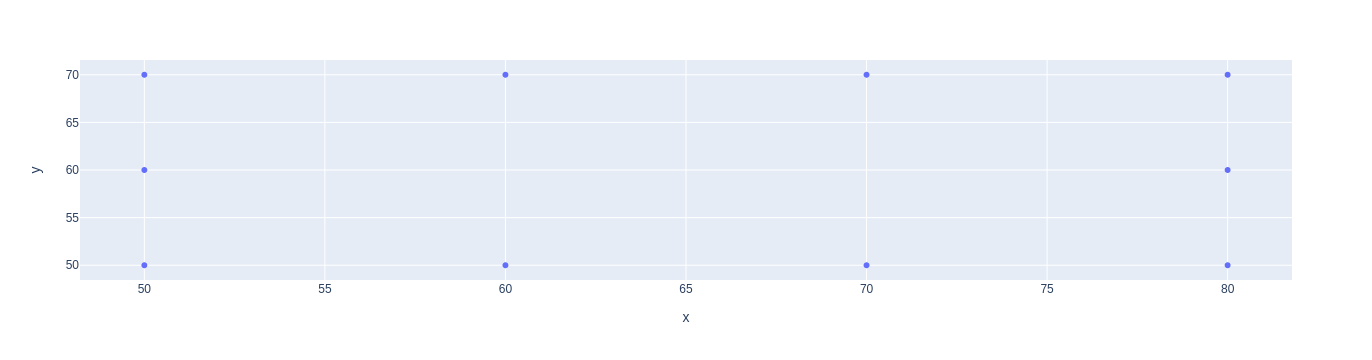

In [221]:
import plotly.express as px


# This plot quickly shows the rough rasterized image of what a box plotted on x, y would be.
fig = px.scatter(x=plot_points[0], y=plot_points[1])
fig.show()

In [222]:
box_alpha

array([[84, 84, 59, 59, 84, 84, 59, 59],
       [72, 51, 51, 72, 72, 51, 51, 72],
       [52, 52, 52, 52, 44, 44, 44, 44]])

In [224]:
# TODO: How to effectively combine the following output so that we have a subset of locations where the object exists?
# x, y
np.transpose(get_rasterized_points(box_alpha[0], box_alpha[1], 10))

array([[80, 80, 80, 50, 60, 70, 50, 50, 60, 70],
       [50, 60, 70, 50, 50, 50, 60, 70, 70, 70]])

In [226]:
# x, z
np.transpose(get_rasterized_points(box_alpha[0], box_alpha[2], 10))

array([[80, 50, 60, 70, 70, 80, 50, 60],
       [50, 50, 50, 50, 40, 40, 40, 40]])

In [227]:
# y, z
np.transpose(get_rasterized_points(box_alpha[1], box_alpha[2], 10))

array([[50, 60, 70, 70, 50, 60],
       [50, 50, 50, 40, 40, 40]])

In [228]:
x_y_alpha = get_rasterized_points(box_alpha[0], box_alpha[1], 10)
x_z_alpha = get_rasterized_points(box_alpha[0], box_alpha[2], 10)
y_z_alpha = get_rasterized_points(box_alpha[1], box_alpha[2], 10)
x_y_alpha

[(80, 50),
 (80, 60),
 (80, 70),
 (50, 50),
 (60, 50),
 (70, 50),
 (50, 60),
 (50, 70),
 (60, 70),
 (70, 70)]

In [229]:
box_beta = boxes["beta"]
box_beta

array([[64, 64, 44, 44, 64, 64, 44, 44],
       [67, 51, 51, 67, 67, 51, 51, 67],
       [51, 51, 51, 51,  6,  6,  6,  6]])

In [230]:
x_y_beta = get_rasterized_points(box_beta[0], box_beta[1], 10)
x_z_beta = get_rasterized_points(box_beta[0], box_beta[2], 10)
y_z_beta = get_rasterized_points(box_beta[1], box_beta[2], 10)

In [231]:
for point in x_y_beta:
    print(f"{point} in alpha: {point in x_y_alpha}")

(60, 50) in alpha: True
(60, 60) in alpha: False
(40, 50) in alpha: False
(50, 50) in alpha: True
(40, 60) in alpha: False
(50, 60) in alpha: True


In [232]:
for point in x_z_beta:
    print(f"{point} in alpha: {point in x_z_alpha}")

(60, 50) in alpha: True
(40, 50) in alpha: False
(50, 50) in alpha: True
(60, 0) in alpha: False
(60, 10) in alpha: False
(50, 20) in alpha: False
(50, 30) in alpha: False
(40, 40) in alpha: False
(40, 0) in alpha: False
(50, 0) in alpha: False


In [233]:
for point in y_z_beta:
    print(f"{point} in alpha: {point in y_z_alpha}")

(50, 50) in alpha: True
(60, 50) in alpha: True
(60, 0) in alpha: False
(60, 10) in alpha: False
(60, 20) in alpha: False
(60, 30) in alpha: False
(60, 40) in alpha: True
(50, 0) in alpha: False


In [234]:
def get_box_rasterized_values(box: np.ndarray, fidelity):
    x_values, y_values = get_rasterized_values(box[0], box[1], fidelity)
    extend_x_values, z_values = get_rasterized_values(box[0], box[2], fidelity)
    extend_y_values, extend_z_values = get_rasterized_values(box[1], box[2], fidelity)
    
    x_values = list(set(x_values).union(set(extend_x_values)))
    y_values = list(set(y_values).union(set(extend_y_values)))
    z_values = list(set(z_values).union(set(extend_z_values)))
    
    return x_values, y_values, z_values

In [236]:
alpha_x_values, alpha_y_values, alpha_z_values = get_box_rasterized_values(box_alpha, 10)

In [237]:
beta_x_values, beta_y_values, beta_z_values = get_box_rasterized_values(box_beta, 10)

In [238]:
for x_val in beta_x_values:
    if x_val in alpha_x_values:
        print(f"{x_val} in alpha")

50 in alpha
60 in alpha


In [239]:
for y_val in beta_y_values:
    if y_val in alpha_y_values:
        print(f"{y_val} in alpha")

50 in alpha
60 in alpha


In [240]:
for z_val in beta_z_values:
    if z_val in alpha_z_values:
        print(f"{z_val} in alpha")

40 in alpha
50 in alpha


In [241]:
# TODO: Next objective is to setup our x,y,z "tables" and track where objects are placed. Then simulate query
boxes

{'alpha': array([[84, 84, 59, 59, 84, 84, 59, 59],
        [72, 51, 51, 72, 72, 51, 51, 72],
        [52, 52, 52, 52, 44, 44, 44, 44]]),
 'beta': array([[64, 64, 44, 44, 64, 64, 44, 44],
        [67, 51, 51, 67, 67, 51, 51, 67],
        [51, 51, 51, 51,  6,  6,  6,  6]]),
 'gamma': array([[87, 87, 96, 96, 87, 87, 96, 96],
        [24, 57, 57, 24, 24, 57, 57, 24],
        [27, 27, 27, 27, 75, 75, 75, 75]]),
 'delta': array([[85, 85, 83, 83, 85, 85, 83, 83],
        [46, 11, 11, 46, 46, 11, 11, 46],
        [74, 74, 74, 74, 55, 55, 55, 55]]),
 'epsilon': array([[28, 28,  5,  5, 28, 28,  5,  5],
        [11,  9,  9, 11, 11,  9,  9, 11],
        [90, 90, 90, 90, 64, 64, 64, 64]]),
 'zeta': array([[92, 92, 71, 71, 92, 92, 71, 71],
        [26, 98, 98, 26, 26, 98, 98, 26],
        [ 8,  8,  8,  8, 38, 38, 38, 38]])}

In [244]:
selected_box_names = ["beta", "gamma", "delta", "epsilon"]

x_lookup_table = {}
y_lookup_table = {}
z_lookup_table = {}

fidelity = 10

for i in range(-10, 100, fidelity):
    for lookup_table in [x_lookup_table, y_lookup_table, z_lookup_table]:
        lookup_table[i] = []

x_lookup_table

{-10: [],
 0: [],
 10: [],
 20: [],
 30: [],
 40: [],
 50: [],
 60: [],
 70: [],
 80: [],
 90: []}

In [246]:
for box_name in selected_box_names:
    box = boxes[box_name]
    x_values, y_values, z_values = get_box_rasterized_values(box, 10)
    
    val_table_map = {
        "x": {
            "table": x_lookup_table,
            "values": x_values,
        },
        "y": {
            "table": y_lookup_table,
            "values": y_values,
        },
        "z": {
            "table": z_lookup_table,
            "values": z_values,
        }
    }
    
    for key, val_table in val_table_map.items():
        for val in val_table["values"]:
            if box_name not in val_table["table"][val]:
                val_table["table"][val].append(box_name)
    
x_lookup_table 

{-10: ['epsilon'],
 0: ['epsilon'],
 10: ['epsilon'],
 20: ['epsilon'],
 30: [],
 40: ['beta'],
 50: ['beta'],
 60: ['beta'],
 70: [],
 80: ['gamma', 'delta'],
 90: ['gamma']}

In [247]:
alpha_x_values, alpha_y_values, alpha_z_values = get_box_rasterized_values(box_alpha, 10)
alpha_x_values

[70, 80, 50, 60]

In [248]:
x_partition_set = set()
for val in alpha_x_values:
    x_partition_set = x_partition_set.union(set(x_lookup_table[val]))
x_partition_set


{'beta', 'delta', 'gamma'}

In [249]:
y_partition_set = set()
for val in alpha_y_values:
    y_partition_set = y_partition_set.union(set(y_lookup_table[val]))
y_partition_set

{'beta', 'gamma'}

In [250]:
z_partition_set = set()
for val in alpha_z_values:
    z_partition_set = z_partition_set.union(set(z_lookup_table[val]))
z_partition_set

{'beta', 'delta', 'gamma'}

In [251]:
hits = x_partition_set.intersection(y_partition_set).intersection(z_partition_set)
hits

{'beta', 'gamma'}